<a href="https://colab.research.google.com/github/tdeepakb/deep/blob/master/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/customer_churn-1.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [78]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [79]:
df.duplicated().sum()

0

In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
customer_5 = df[['tenure']]

In [5]:
customer_15 = df['Contract']

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

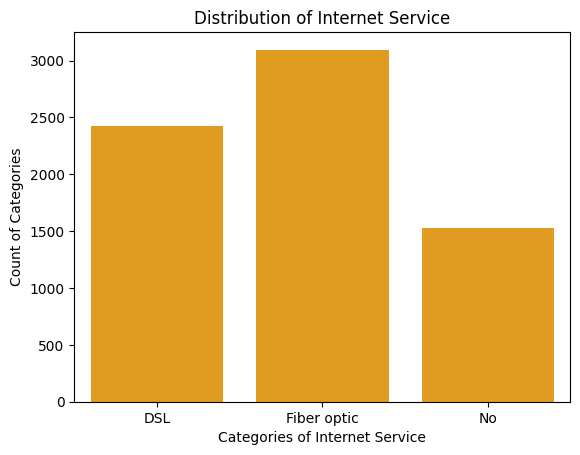

In [9]:
sns.countplot(x=df['InternetService'],color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

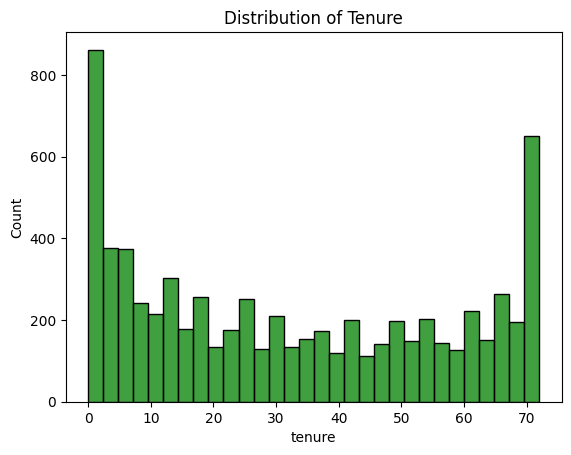

In [12]:
sns.histplot(x=df['tenure'],bins=30,color='green')
plt.title('Distribution of Tenure')
plt.show()

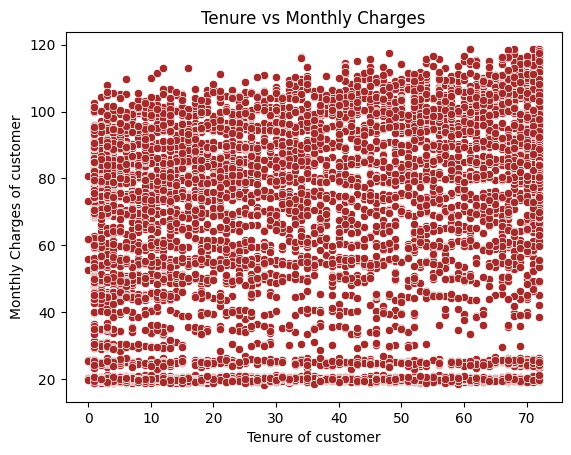

In [14]:
sns.scatterplot(data=df,x=df['tenure'],y=df['MonthlyCharges'],color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

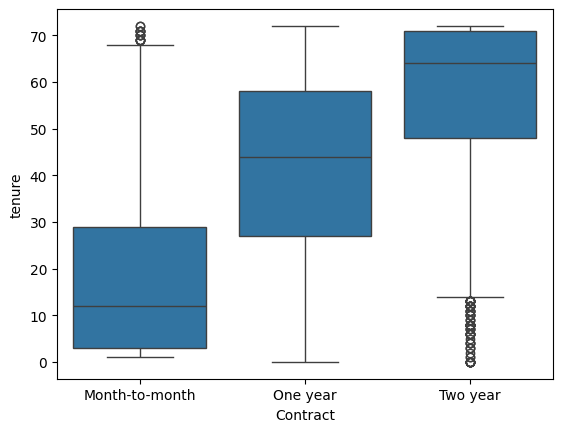

In [16]:
sns.boxplot(data=df,x=df['Contract'],y=df['tenure'])
plt.show()

Linear Regression

In [17]:
X = df[['tenure']]

In [19]:
y = df[['MonthlyCharges']]

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [26]:
predictions = lr.predict(X)
predictions

array([[55.10659011],
       [65.27770087],
       [55.41480558],
       ...,
       [58.18874488],
       [56.03123654],
       [75.14059615]])

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = lr.predict(X_test)
y_pred

array([[55.10659011],
       [67.43520921],
       [70.82557946],
       ...,
       [73.29130328],
       [60.96268418],
       [61.57911514]])

In [29]:
from sklearn.metrics import r2_score

In [30]:
r2_score(y_test,y_pred)

0.05856035027031625

Logistic Regression

In [31]:
X = df[['MonthlyCharges']]

In [32]:
y = df[['Churn']]

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [37]:
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [38]:
y_pred = model.predict(X_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [40]:
accuracy_score(y_test,y_pred)

0.7287104622871047

In [41]:
confusion_matrix(y_test,y_pred)

array([[1797,    0],
       [ 669,    0]])

Multiple Logistic Regression

In [44]:
X = df[['tenure','MonthlyCharges']]

In [45]:
y = df[['Churn']]

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [50]:
lrmodel = LogisticRegression()
lrmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [51]:
y_pred = lrmodel.predict(X_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [53]:
accuracy_score(y_test,y_pred)

0.7977288857345636

In [54]:
confusion_matrix(y_test,y_pred)

array([[944,  92],
       [193, 180]])

Decision Tree

In [56]:
X = df[['tenure']]

In [55]:
y = df[['Churn']]

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [63]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [64]:
y_pred = dt.predict(X_test)
y_pred

array(['Yes', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [66]:
accuracy_score(y_test,y_pred)

0.7572746628814763

In [67]:
confusion_matrix(y_test,y_pred)

array([[951,  85],
       [257, 116]])

Random Forest

In [68]:
X = df[['tenure','MonthlyCharges']]

In [69]:
y = df[['Churn']]

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [73]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [74]:
y_pred = clf.predict(X_test)
y_pred

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [76]:
accuracy_score(y_test,y_pred)

0.7572172266919073

In [77]:
confusion_matrix(y_test,y_pred)

array([[1333,  206],
       [ 307,  267]])